### figure 3 - menopause divided genetic correlations for biomarker traits


In [1]:
require('tidyverse')

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
MENO.DIR <- "../../data/1009/"
summary_files <- list.files(MENO.DIR, pattern="summary_(\\w)*_3_.txt")
summary_files
length(summary_files)

meno_traits <- str_replace_all(summary_files, c("summary_dat_"="", "_3_.txt" =""))

meno_df <- do.call(rbind, lapply(summary_files, function(x) read.table(sprintf("%s/%s", MENO.DIR, x), sep=" ", header=TRUE)))
head(meno_df)
    

# read in all the error bars now


[1] "summary_dat_Alanine_aminotransferase_3_.txt"  
 [2] "summary_dat_Albumin_3_.txt"                   
 [3] "summary_dat_Alkaline_phosphatase_3_.txt"      
 [4] "summary_dat_Apolipoprotein_A_3_.txt"          
 [5] "summary_dat_Apolipoprotein_B_3_.txt"          
 [6] "summary_dat_Aspartate_aminotransferase_3_.txt"
 [7] "summary_dat_C_reactive_protein_3_.txt"        
 [8] "summary_dat_Calcium_3_.txt"                   
 [9] "summary_dat_Creatinine_3_.txt"                
[10] "summary_dat_Creatinine_in_urine_3_.txt"       
[11] "summary_dat_Cystatin_C_3_.txt"                
[12] "summary_dat_Direct_bilirubin_3_.txt"          
[13] "summary_dat_eGFR_3_.txt"                      
[14] "summary_dat_Fasting_glucose_3_.txt"           
[15] "summary_dat_Gamma_glutamyltransferase_3_.txt" 
[16] "summary_dat_Glucose_3_.txt"                   
[17] "summary_dat_HDL_cholesterol_3_.txt"           
[18] "summary_dat_IGF_1_3_.txt"                     
[19] "summary_dat_LDL_direct_3_.txt"                
[20] "summary_dat_Lipoprotein_A_3_.txt"             
[21] "summary_dat_Microalbumin_in_urine_3_.txt"     
[22] "summary_dat_Non_albumin_protein_3_.txt"       
[23] "summary_dat_Oestradiol_3_.txt"                
[24] "summary_dat_Phosphate_3_.txt"                 
[25] "summary_dat_Potassium_in_urine_3_.txt"        
[26] "summary_dat_Rheumatoid_factor_3_.txt"         
[27] "summary_dat_SHBG_3_.txt"                      
[28] "summary_dat_Sodium_in_urine_3_.txt"           
[29] "summary_dat_Testosterone_3_.txt"              
[30] "summary_dat_Total_bilirubin_3_.txt"           
[31] "summary_dat_Total_protein_3_.txt"             
[32] "summary_dat_Triglycerides_3_.txt"             
[33] "summary_dat_Urate_3_.txt"                     
[34] "summary_dat_Urea_3_.txt"                      
[35] "summary_dat_Vitamin_D_3_.txt"

[1] 35

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V16,Omegacor.1.2.,Omegacor.1.3.,Omegacor.2.3.,Omegacor.1.2..1,Omegacor.1.3..1,Omegacor.2.3..1,V23,V24,V25
Alanine_aminotransferase,171761,0.8886492,0.111350832,4.221948e-05,4.344132e-05,4.002166e-05,4.344132e-05,4.679752e-05,4.378389e-05,⋯,0.9075228,0.9505843,0.8271969,0.8821739,0.9951961,0.9169440,0.9338333,NA,NA,NA
Albumin,171080,0.7892800,0.210719986,6.435202e-05,2.722589e-05,2.627956e-05,2.722589e-05,2.845400e-05,2.704310e-05,⋯,0.9568056,0.5936868,0.5802556,0.9251796,0.6815876,0.6582979,0.9831620,0.12667616,0.13129081,0.15199314
Alkaline_phosphatase,171766,0.9903510,0.009648987,4.791945e-03,4.842150e-03,5.677609e-03,4.842150e-03,4.907638e-03,5.751071e-03,⋯,0.9978689,0.9974450,0.9956351,0.9970613,0.9994827,0.9980811,0.9985207,0.05652593,0.12617868,0.18766034
Apolipoprotein_A,170911,0.9632014,0.036798613,2.927845e-04,3.026123e-04,3.097107e-04,3.026123e-04,3.178069e-04,3.237661e-04,⋯,0.9758659,0.9833407,0.9613442,0.9676205,0.9982725,0.9834889,0.9829612,0.03208511,0.08147737,0.10808368
Apolipoprotein_B,171703,0.8330473,0.166952726,6.939120e-04,-1.092971e-04,6.722047e-05,-1.092971e-04,1.151326e-04,5.308849e-05,⋯,0.6838992,-0.4085586,0.3196429,0.6571077,-0.3633006,0.3829064,0.7110847,0.31502697,0.11377243,0.01871006
Aspartate_aminotransferase,171728,0.9374903,0.062509723,1.316626e-04,1.104696e-04,1.102440e-04,1.104696e-04,1.263388e-04,1.167574e-04,⋯,0.9555025,0.8167216,0.8521178,0.9385871,0.8935663,0.9135600,0.9705444,NA,NA,NA


Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_double(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_double(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_double(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_double(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_double(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)


trait,int,sex,value
NA,Alanine_aminotransferase,hf,NA
NA,Alanine_aminotransferase,hf,NA
NA,Alanine_aminotransferase,hm,NA
NA,Alanine_aminotransferase,hm,NA
NA,Alanine_aminotransferase,NA,up
NA,Alanine_aminotransferase,NA,low


In [13]:
h_files <- list.files(MENO.DIR, pattern="h_err_(\\w)*_3_.txt")

head(h_files)
read.delim2(sprintf("%s/%s", MENO.DIR, "h_err_Alanine_aminotransferase_3_.txt"))
read.delim2(sprintf("%s/%s", MENO.DIR, "h_err_Albumin_3_.txt"))

[1] "h_err_Alanine_aminotransferase_3_.txt"  
[2] "h_err_Albumin_3_.txt"                   
[3] "h_err_Alkaline_phosphatase_3_.txt"      
[4] "h_err_Apolipoprotein_A_3_.txt"          
[5] "h_err_Apolipoprotein_B_3_.txt"          
[6] "h_err_Aspartate_aminotransferase_3_.txt"

trait,int,sex,value
NA,Alanine_aminotransferase,hf,NA
NA,Alanine_aminotransferase,hf,NA
NA,Alanine_aminotransferase,hm,NA
NA,Alanine_aminotransferase,hm,NA
NA,Alanine_aminotransferase,NA,up
NA,Alanine_aminotransferase,NA,low


trait,int,sex,value
0.160320505807905,Albumin,hf,0.140947474235376
0.136674552801981,Albumin,hf,0.114316492007815
0.160320505807905,Albumin,hm,0.137669687801449
0.136674552801981,Albumin,hm,0.112447402017497
0.160320505807905,Albumin,NA,up
0.136674552801981,Albumin,NA,low


In [15]:
# Omegacor.1.2 - pre_meno vs. post_meno
# Omegacor.1.3 - pre_meno vs. men
# Omegacor.1.3 - post_meno vs. men

cols_d3 <- c("trait", "n", "pi[1]", "pi[2]", 
"Sigma[1,1,1]", 
"Sigma[1,1,2]", 
"Sigma[1,2,1]",
"Sigma[1,2,2]", 
             
"Sigma[2,1,1]", 
"Sigma[2,1,2]", 
"Sigma[2,2,1]",
"Sigma[2,2,2]",
             "miss",
"rg.1","rg.2","rg.3", "rgl.1","rgl.2","rgl.3", "rgu.1","rgu.2","rgu.3", "h1", "h2", "h3")

dim(meno_df)
length(cols_d3)
colnames(meno_df) <- cols_d3

[1] 35 25

[1] 25

In [16]:
genetic_corr <- meno_df %>% select("trait","rg.1","rg.2","rg.3", "rgl.1","rgl.2","rgl.3", "rgu.1","rgu.2","rgu.3") 
genetic_corr_long <- genetic_corr %>% gather(rg_type, value, -trait) %>% mutate(value=as.numeric(value))

gen_cor_df <- genetic_corr_long %>% separate(rg_type, c("int", "group"), sep="\\.") %>% spread(key="int", value="value") %>%
mutate(group=c("pre_vs_post", "pre_vs_men", "post_vs_men")[as.numeric(group)])

In [19]:
biomarkers_poor <- c("Potassium_in_urine", "Microalbumin_in_urine", "Sodium_in_urine", 
                     "FEV_FVC", "Creatinine_in_urine", "Oestradiol", "Rheumatoid_factor",
                     "Glucose", "Fasting_glucose") #"SHBG? Aminotransferase? - should we remove?


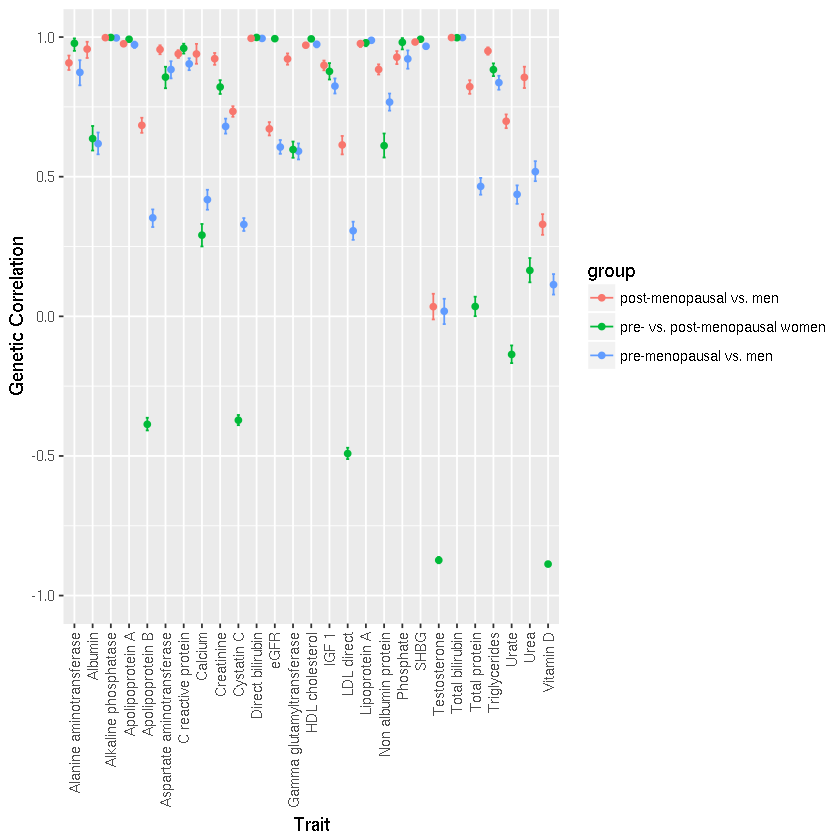

In [25]:
gen_cor_df2 <- gen_cor_df %>% filter(!trait %in% biomarkers_poor) %>% 
mutate(trait=str_replace_all(trait, "_", " "),
      group=ifelse(group=="post_vs_men","post-menopausal vs. men", ifelse(group=="pre_vs_men","pre-menopausal vs. men", "pre- vs. post-menopausal women")))
ggplot(gen_cor_df2, aes(x=trait, y=rg, color=group))+
geom_point(position=position_dodge(0.9))+
geom_errorbar(aes(ymin=rgl, ymax=rgu),  position=position_dodge(0.9), width=0.5) + 
ylim(-1,1)+
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5)) +ylab("Genetic Correlation")+xlab("Trait") 

In [27]:
trait_order <- gen_cor_df2 %>% filter(group=="pre- vs. post-menopausal women") %>% select(rg, trait) %>% arrange(desc(rg)) %>% select(trait)

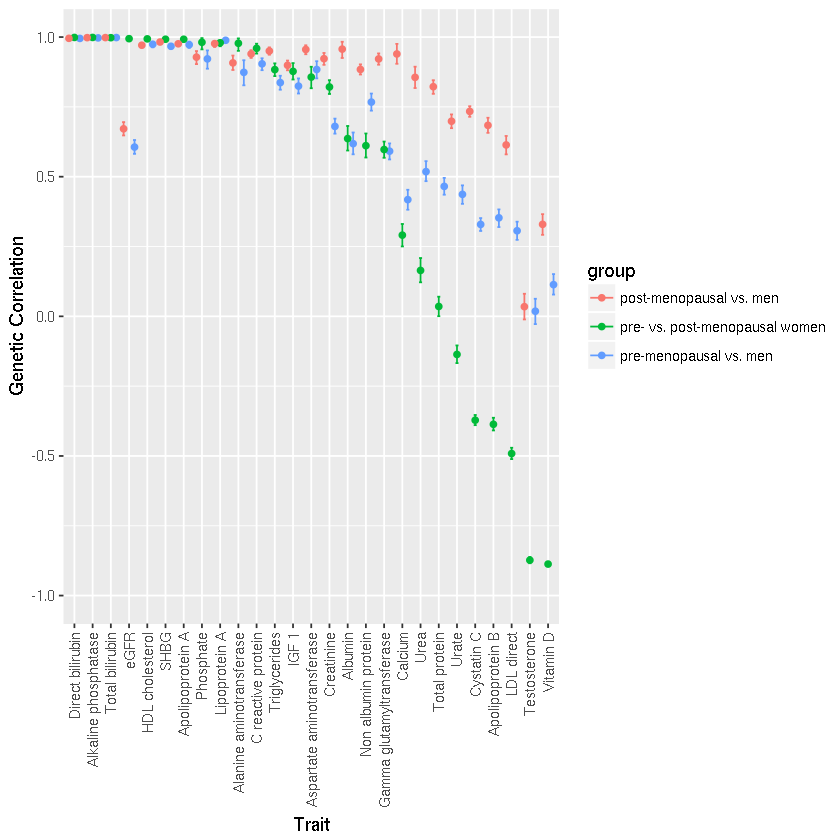

In [31]:
# reorder these by something?
gen_cor_df2$trait <- factor(gen_cor_df2$trait, levels= trait_order$trait)
ggplot(gen_cor_df2, aes(x=trait, y=rg, color=group))+
geom_point(position=position_dodge(0.9))+
geom_errorbar(aes(ymin=rgl, ymax=rgu),  position=position_dodge(0.9), width=0.5) + 
ylim(-1,1)+
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5)) +ylab("Genetic Correlation")+xlab("Trait") 

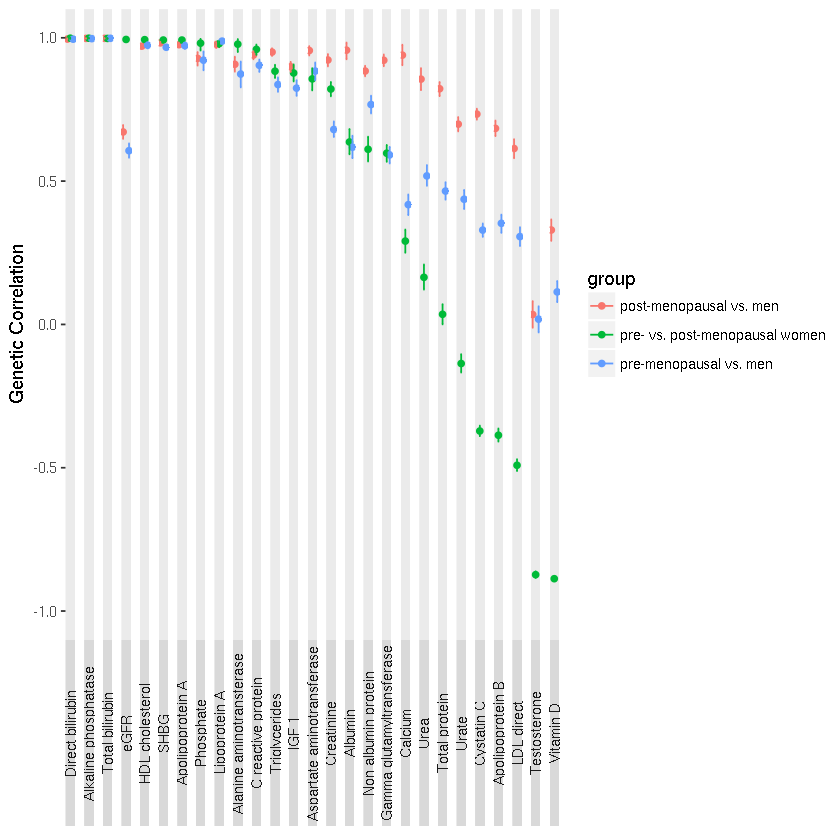

In [30]:
# try a facet grid

ggplot(gen_cor_df2, aes(x=group, y=rg, color=group))+
geom_point(position=position_dodge(0.5))+
geom_errorbar(aes(ymin=rgl, ymax=rgu),  position=position_dodge(0.5), width=0.5) + 
ylim(-1,1)+
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Genetic Correlation")+
facet_grid( . ~ trait, scales = "free", space = "free", switch="both") +  
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  theme(strip.text.x = element_text(angle = 90))+
theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank())

